This notebook plots direction of head angle movement for both players for any given trial. One plot shows directions from 'trial end' of the previous trial to 'slice onset' of the chosen trial. The other plot shows directions from 'slice onset' to 'server selected trigger activation' of the chosen trial.

In [1]:
import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))
main_copy_dir = os.path.join(parent_dir, "main_copy")
octagon_analysis = os.path.join(parent_dir, "octagon_analysis")
sys.path.append(main_copy_dir)
sys.path.append(octagon_analysis)

print("Added paths to sys.path:", main_copy_dir, octagon_analysis)

Added paths to sys.path: /Users/benny/Desktop/MSc/Project/Git/repos/main_copy /Users/benny/Desktop/MSc/Project/Git/repos/octagon_analysis


In [2]:
#imports
%load_ext autoreload
%autoreload 2
import scipy
import parse_data.prepare_data as prepare_data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import globals
import plotting.plot_trajectory as plot_trajectory
import plotting.plot_octagon as plot_octagon
import data_extraction.extract_trial as extract_trial
import math
import trajectory_analysis.trajectory_vectors as trajectory_vectors
import trajectory_analysis.trajectory_headangle as trajectory_headangle
from IPython.display import Image, display
import data_extraction.get_indices as get_indices
import prominent_direction_functions as prominent_direction_functions
import flip_rotate_headangle_functions
import headangle_analysis_plotting_functions
import headangle_bin_assignment_new
import analysis.wall_visibility_and_choice as wall_visibility_and_choice
import calculate_probabilities_functions
import compare_rotation_direction_trials

In [3]:
data_folder = '/Users/benny/Desktop/MSc/Project/Git/repos_backup/octagon_analysis'

json_filenames_all_social = [r'Json_data/2024-11-19_15-22-56_SophiaHocineSocial.json',
                                r'Json_data/2024-11-12_13-31-14_KhadijaWendySocial.json', 
                                r'Json_data/2024-12-19_15-28-24_JingjingYeungSocial.json', 
                                r'Json_data/2024-10-17_16-41-38_ZimoElsaSocial.json', 
                                r'Json_data/2025-01-15_15-21-27_YixuanMarcoSocial.json',
                                r'Json_data/2024-11-13_14-18-54_NasiaRyanSocial.json', 
                                r'Json_data/2024-11-19_14-24-49_AmyXinyuanSocial.json', 
                                r'Json_data/2024-09-27_14-25-20_SaraEmilySocial.json', 
                                r'Json_data/2024-11-13_15-28-07_YichuanHoiSocial.json', 
                                r'Json_data/2024-11-20_15-16-21_SunnyVinceSocial.json', 
                                r'Json_data/2025-01-15_16-50-13_YuChunSecondSocial.json', 
                                r'Json_data/2024-11-12_15-23-24_FrancescaSenSzeSocial.json', 
                                r'Json_data/2024-10-17_14-28-40_ShamirAbigailSocial.json',
                                r'Json_data/2024-09-13_11-31-00_YansuJerrySocial.json', 
                                r'Json_data/2024-11-20_14-17-44_JasonRahulSocial.json']
 
json_filenames_all_solo = [r'Json_data/2024-12-20_17-36-54_ChristopherFirstSolo.json',
                                r'Json_data/2025-01-15_15-12-39_MarcoFirstSolo.json',
                                r'Json_data/2024-12-19_15-51-33_YeungSecondSolo.json',
                                r'Json_data/2024-11-12_15-44-54_FrancescaSecondSolo.json',
                                r'Json_data/2024-11-12_15-11-45_SenFirstSolo.json',
                                r'Json_data/2024-11-20_15-39-49_VinceSecondSolo.json',
                                r'Json_data/2024-11-19_14-18-18_AmyFirstSolo.json',
                                r'Json_data/2024-11-12_15-45-35_SenSecondSolo.json',
                                r'Json_data/2024-11-12_13-50-23_KhadijaSecondSolo.json',
                                r'Json_data/2024-11-13_15-21-50_HoiFirstSolo.json',
                                r'Json_data/2024-09-13_11-23-37_YansuFirstSolo.json',
                                r'Json_data/2024-11-13_15-22-20_YichuanFirstSolo.json',
                                r'Json_data/2024-11-20_15-10-17_VinceFirstSolo.json',
                                r'Json_data/2025-01-15_16-14-40_YuChunFirstSolo.json',
                                r'Json_data/2024-11-12_13-18-59_WendyFirstSolo.json',
                                r'Json_data/2024-10-17_14-51-22_AbigailSecondSolo.json',
                                r'Json_data/2024-09-13_11-53-56_JerrySecondSolo.json',
                                r'Json_data/2024-09-27_14-14-42_EmilyFirstSolo.json',
                                r'Json_data/2025-01-15_16-50-13_YuChunSecondSolo.json',
                                r'Json_data/2024-11-12_13-50-20_WendySecondSolo.json',
                                r'Json_data/2025-01-15_15-46-04_MarcoSecondSolo.json',
                                r'Json_data/2024-10-17_14-20-50_AbigailFirstSolo.json',
                                r'Json_data/2024-11-13_15-51-39_YichuanSecondSolo.json',
                                r'Json_data/2024-11-20_14-41-56_RahulSecondSolo.json',
                                r'Json_data/2024-10-17_14-20-28_ShamirFirstSolo.json',
                                r'Json_data/2025-01-15_15-47-11_YixuanSecondSolo.json',
                                r'Json_data/2024-11-19_15-15-53_SophiaFirstSolo.json',
                                r'Json_data/2025-01-15_16-50-37_RuiqingSecondSolo.json',
                                r'Json_data/2024-11-20_15-40-08_SunnySecondSolo.json',
                                r'Json_data/2024-09-27_14-14-31_SaraFirstSolo.json',
                                r'Json_data/2024-09-27_14-45-46_EmilySecondSolo.json',
                                r'Json_data/2024-11-12_13-19-22_KhadijaFirstSolo.json',
                                r'Json_data/2024-11-12_15-13-34_FrancescaFirstSolo.json',
                                r'Json_data/2024-11-19_15-47-53_SophiaSecondSolo.json',
                                r'Json_data/2024-11-20_14-12-33_RahulFirstSolo.json',
                                r'Json_data/2024-10-17_14-50-03_ShamirSecondSolo.json',
                                r'Json_data/2024-09-13_11-53-34_YansuSecondSolo.json',
                                r'Json_data/2024-10-17_17-12-29_ElsaSecondSolo.json',
                                r'Json_data/2024-12-19_15-22-13_YeungFirstSolo.json',
                                r'Json_data/2024-12-19_15-51-58_JingjingSecondSolo.json',
                                r'Json_data/2024-11-13_15-51-16_HoiSecondSolo.json',
                                r'Json_data/2024-11-19_14-18-44_XinyuanFirstSolo.json',
                                r'Json_data/2024-12-20_18-06-44_ChristopherSecondSolo.json',
                                r'Json_data/2024-10-17_16-35-45_ElsaFirstSolo.json',
                                r'Json_data/2024-11-20_15-10-00_SunnyFirstSolo.json',
                                r'Json_data/2024-11-19_14-44-31_XinyuanSecondSolo.json',
                                r'Json_data/2024-11-20_14-12-06_JasonFirstSolo.json',
                                r'Json_data/2024-12-20_17-36-27_KirtanFirstSolo.json',
                                r'Json_data/2024-10-17_16-36-0_ZimoFirstSolo.json',
                                r'Json_data/2024-09-27_14-45-55_SaraSecondSolo.json',
                                r'Json_data/2024-10-17_17-11-46_ZimoSecondSolo.json',
                                r'Json_data/2024-12-20_18-06-10_KirtanSecondSolo.json',
                                r'Json_data/2025-01-15_16-14-58_RuiqingFirstSolo.json',
                                r'Json_data/2024-11-19_15-14-19_HocineFirstSolo.json',
                                r'Json_data/2024-11-20_14-42-16_JasonSecondSolo.json',
                                r'Json_data/2024-12-19_15-20-18_JingjingFirstSolo.json',
                                r'Json_data/2024-09-13_11-23-50_JerryFirstSolo.json',
                                r'Json_data/2025-01-15_15-12-13_YixuanFirstSolo.json',
                                r'Json_data/2024-11-19_15-47-29_HocineSecondSolo.json',
                                r'Json_data/2024-11-19_14-44-00_AmySecondSolo.json']

json_filename = r'Json_data/2024-11-12_13-50-23_KhadijaSecondSolo.json'


                             

In [4]:
#prepare socials
df, trial_list = prepare_data.prepare_combined_session_data(data_folder, json_filenames_all_social)

filepath: /Users/benny/Desktop/MSc/Project/Git/repos_backup/octagon_analysis/Json_data/2024-11-19_15-22-56_SophiaHocineSocial.json
Loading complete.
filepath: /Users/benny/Desktop/MSc/Project/Git/repos_backup/octagon_analysis/Json_data/2024-11-12_13-31-14_KhadijaWendySocial.json
Loading complete.
filepath: /Users/benny/Desktop/MSc/Project/Git/repos_backup/octagon_analysis/Json_data/2024-12-19_15-28-24_JingjingYeungSocial.json
Loading complete.
filepath: /Users/benny/Desktop/MSc/Project/Git/repos_backup/octagon_analysis/Json_data/2024-10-17_16-41-38_ZimoElsaSocial.json
Loading complete.
filepath: /Users/benny/Desktop/MSc/Project/Git/repos_backup/octagon_analysis/Json_data/2025-01-15_15-21-27_YixuanMarcoSocial.json
Loading complete.
filepath: /Users/benny/Desktop/MSc/Project/Git/repos_backup/octagon_analysis/Json_data/2024-11-13_14-18-54_NasiaRyanSocial.json
Loading complete.
filepath: /Users/benny/Desktop/MSc/Project/Git/repos_backup/octagon_analysis/Json_data/2024-11-19_14-24-49_AmyXin

In [ ]:
for player_id in range(2):
    
    for trial_index, trial in enumerate(trial_list):
        
        headangles_array = np.array(compare_rotation_direction_trials.extract_headangles_before_slice_onset(trial=trial, player_id=player_id))

        if len(headangles_array) <= 1:
            print(f"Trial number {trial_index} is empty")
            continue
            
        elif len(headangles_array) < steps:
            print(f"Trial number {trial_index} is too short")
            continue
            
        change_indices, angle_list = prominent_direction_functions.get_change_indices_smoothed_windows(headangles_array, steps)

In [75]:
P0_change_indices = []
P1_change_indices = []

for player_id in range (2):
    
    headangles_array_prev = np.array(compare_rotation_direction_trials.extract_headangles_before_slice_onset(trial=trial_list[1], player_id=player_id))
    
    if len(headangles_array_prev) <= 1:
        continue
            
    elif len(headangles_array_prev) < 10:
        continue
            
    change_indices, angle_list = prominent_direction_functions.get_change_indices_smoothed_windows(headangles_array_prev, 10)
    if player_id == 0:
        P0_change_indices = change_indices
    elif player_id == 1:
        P1_change_indices = change_indices
    
print(len(P0_change_indices[0]))

51


In [76]:
P0_windows_prev = prominent_direction_functions.get_headangle_change_windows(P0_change_indices)
P1_windows_prev = prominent_direction_functions.get_headangle_change_windows(P1_change_indices)
print(len(P0_windows_prev))
print(len(P1_windows_prev))

13
1


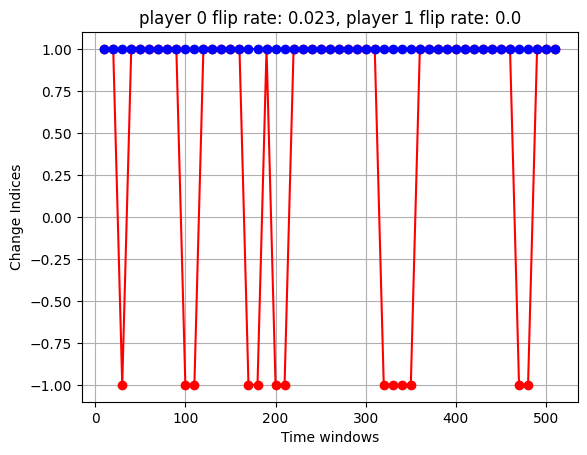

In [79]:
import matplotlib.pyplot as plt

prev_time_points_P0 = P0_change_indices[0]
prev_time_points_P1 = P1_change_indices[0]

total_time_points_prev = len(headangles_array_prev)

P0_number_of_switches_prev = len(P0_windows_prev)-1
P1_number_of_switches_prev = len(P1_windows_prev)-1

P0_flip_rate_prev = round((P0_number_of_switches_prev/total_time_points_prev),3)
P1_flip_rate_prev = round((P1_number_of_switches_prev/total_time_points_prev),3)

plt.plot(prev_time_points_P0, P0_change_indices[1], marker='o', linestyle='-', color='r')
plt.plot(prev_time_points_P1, P1_change_indices[1], marker='o', linestyle='-', color='b')

plt.xlabel('Time windows')
plt.ylabel('Change Indices')


plt.title(f"player 0 flip rate: {P0_flip_rate_prev}, player 1 flip rate: {P1_flip_rate_prev}") 

plt.grid(True)
plt.show()

In [61]:
P0_change_indices_from_slice_onset = []
P1_change_indices_from_slice_onset = []

for player_id in range (2):
    
    headangles_array = np.array(trajectory_vectors.extract_trial_player_headangles(trial=trial_list[1], player_id=player_id))
    
    if len(headangles_array) <= 1:
        continue
            
    elif len(headangles_array) < 10:
        continue
            
    change_indices, angle_list = prominent_direction_functions.get_change_indices_smoothed_windows(headangles_array, 10)
    if player_id == 0:
        P0_change_indices_from_slice_onset = change_indices
    elif player_id == 1:
        P1_change_indices_from_slice_onset = change_indices
    
    
print(len(P1_change_indices_from_slice_onset[1]))
print(len(P0_change_indices_from_slice_onset[1]))
print(len(headangles_array))

19
19
194


In [56]:
P0_windows = prominent_direction_functions.get_headangle_change_windows(P0_change_indices_from_slice_onset)
P1_windows = prominent_direction_functions.get_headangle_change_windows(P1_change_indices_from_slice_onset)
print(len(P0_windows))
print(len(P1_windows))


7
1


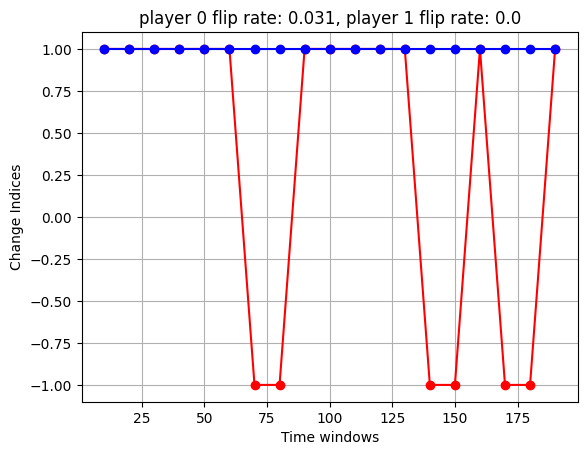

In [80]:
import matplotlib.pyplot as plt

time_points_P0 = P0_change_indices_from_slice_onset[0]
time_points_P1 = P1_change_indices_from_slice_onset[0]

total_time_points = len(headangles_array)

P0_number_of_switches = len(P0_windows)-1
P1_number_of_switches = len(P1_windows)-1

P0_flip_rate = round((P0_number_of_switches/total_time_points),3)
P1_flip_rate = round((P1_number_of_switches/total_time_points),3)


plt.plot(time_points_P0, P0_change_indices_from_slice_onset[1], marker='o', linestyle='-', color='r')
plt.plot(time_points_P1, P1_change_indices_from_slice_onset[1], marker='o', linestyle='-', color='b')

plt.xlabel('Time windows')
plt.ylabel('Change Indices')


#plt.title('Change Indices Over Time')
plt.title(f"player 0 flip rate: {P0_flip_rate}, player 1 flip rate: {P1_flip_rate}") 

plt.grid(True)
plt.show()

In [ ]:
# finding head angle bins for each player at slice onset

In [83]:
bins = headangle_bin_assignment_new.sort_head_angle_into_bin(trial_list, 1, debug=False)
print(bins)

[3, 6]


In [ ]:
# flip rate calculation before slice onset

num_players = 2
steps = 10

P0_flip_rates = []
P1_flip_rates = []

for trial_index, trial in enumerate(trial_list):

    player_change_indices = []
    player_flip_rates = []
    
    for player_id in range (num_players):
        headangles_array_prev = np.array(compare_rotation_direction_trials.extract_headangles_before_slice_onset(trial=trial_list[trial_index], player_id=player_id))
        total_time_points_prev = len(headangles_array_prev)
        
        if len(headangles_array_prev) <= 1:
            continue
        elif len(headangles_array_prev) < 10:
            continue
            
        change_indices, angle_list = prominent_direction_functions.get_change_indices_smoothed_windows(headangles_array_prev, steps)
        player_change_indices.append(change_indices)

        total_time_points_prev = len(headangles_array_prev)

        windows_prev = prominent_direction_functions.get_headangle_change_windows(change_indices)

        number_of_switches_prev = len(windows_prev)-1
        flip_rate_prev = round((number_of_switches_prev/total_time_points_prev),3)
        
        player_flip_rates.append(flip_rate_prev)

    P0_flip_rates.append(player_flip_rates[0])
    P1_flip_rates.append(player_flip_rates[1])


   
